In [1]:
import torch
from diffusers import DiffusionPipeline


In [2]:
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float32,use_safetensors=True,  variant="fp16")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
pipe = pipe.to('cpu')

In [6]:
prompt = "people in the train."
image = pipe(prompt,num_inference_steps = 10).images[0]

  0%|          | 0/10 [00:00<?, ?it/s]

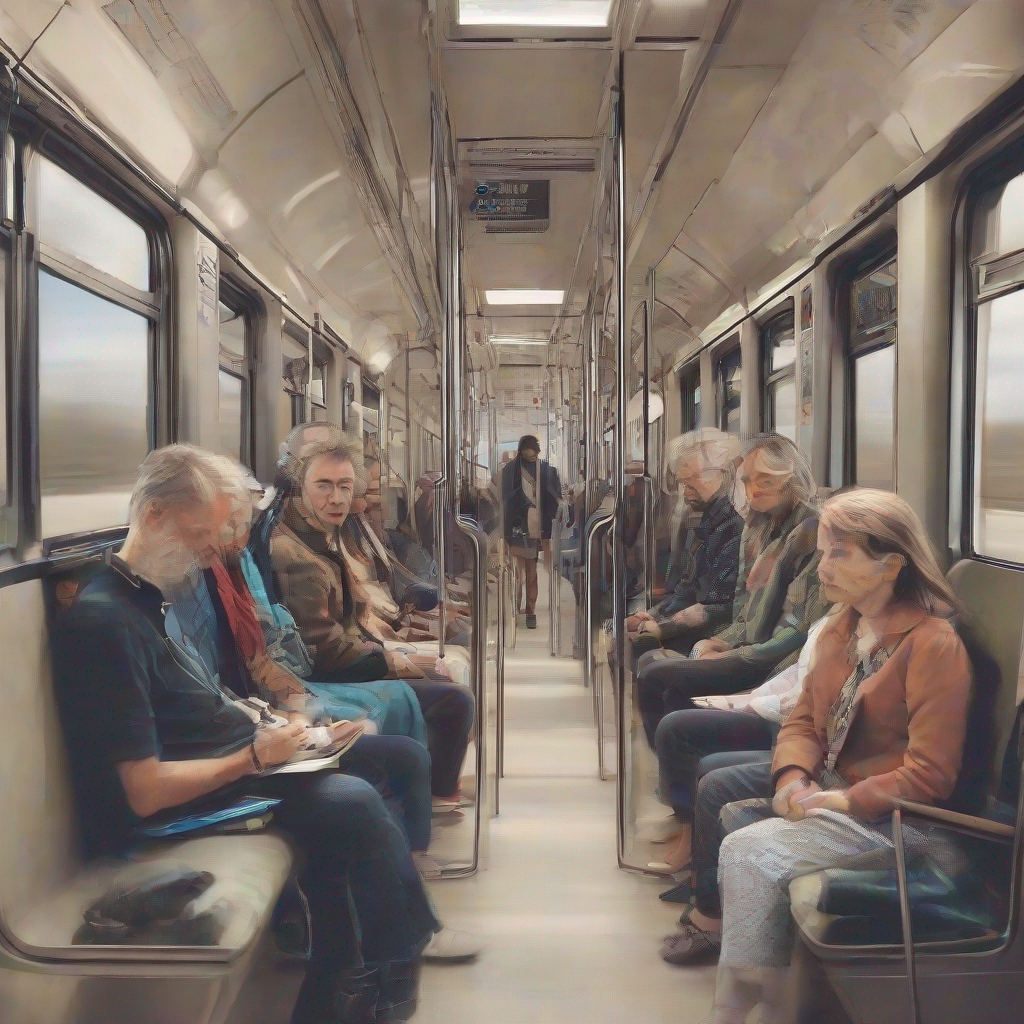

In [7]:
image

In [12]:
# diffusion model num_inference 10 은근 감성있는 결과가 나왔다. 
# 그러면 LoRA(Low_rank Adaptation of Large Language Models)로 fine-tuning을 해보자
#LoRA는 Pretrained 모델의 weights를 고정하고, 그 위에 새로운 task를 위한 weights를 추가하는 방법으로, 기존에 거대한 모델의 파라미터를 고정시킴으로서 trainable 파라미터의 숫자를 크게 줄인다. 
#이로 인해서 기존의 fine tuning보다 빠르고 일부 weight만 바뀌기 때문에 더 적은양의 데이터로도 fine tuning이 가능하다.

train_dataset_path = './finetuning_dataset'


In [51]:
# hugging face에서는 이렇게 모델을 고정시키고 파인튜닝을 할 수 있는 방법을 peft로 구성해놨다.
# 허깅페이스 peft는 low rank adapters, ia3, adalora가 있다.
# 프롬프트 훈련, 튜닝을 할 수도 있다는 것을 알아두고 나는 이미지이므로 이미지로 넘어가자

In [65]:
import torchvision
torch_list = []
for i in range(1,27):
    torch_list.append(torchvision.io.read_image(path=train_dataset_path+f'/1/{1}.jpg'))


In [69]:
from datasets import Dataset
import pandas as pd

labels = []
for i in range(1,27):
    labels.append("Basquiat")

In [73]:
dt = pd.DataFrame({"image":torch_list,"label":labels})

In [75]:
dt.to_csv('metadata.csv')

In [80]:
from datasets import load_dataset

dts = Dataset.from_csv('./metadata.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [82]:
dts = dts.remove_columns("Unnamed: 0")
dts

Dataset({
    features: ['image', 'label'],
    num_rows: 26
})